# 第三次数学实验

## 问题一：使用`dsolve`命令求下列微分方程的解析解, 并画出它们的图形

\begin{align}
y' &= y + 2x, & y(0) &= 1, & x &\in (0, 1) \tag{1.1} \\
y'' + y &= \cos(x), & y(0) &= 1, & y'(0) &= 0 \tag{1.2} \\
x' &= ax + by, & y' &= ax - by, & x(0) &= 2, & y(0) &= 0, & a &= 2, b = 1; & a &= 1, b = 2; & a &= 1, b = 1 \tag{1.3}
\end{align}

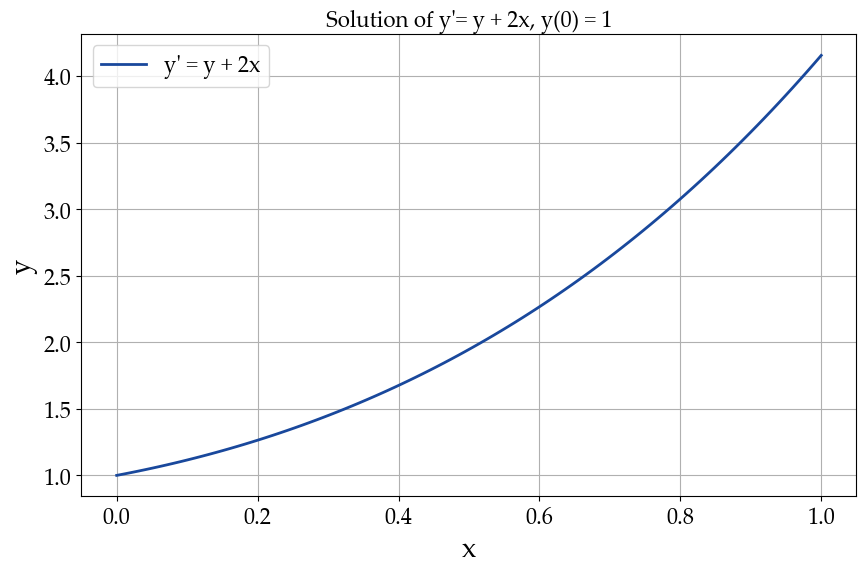

In [1]:
from sympy import symbols, Function, Eq, dsolve, cos, exp
from sympy.abc import t
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Palatino Linotype'

x = symbols('x')
y = Function('y')(x)

eq = Eq(y.diff(x), y + 2 * x)
sol = dsolve(eq, y, ics={y.subs(x, 0): 1})

# 生成数值数据点
x_vals = np.linspace(0, 1, 100)
y_vals = [sol.rhs.subs(x, val).evalf() for val in x_vals]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color=(25/255, 72/255, 156/255), linewidth=2)
plt.title('Solution of y\'= y + 2x, y(0) = 1', fontsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['y\' = y + 2x'], fontsize=16)
plt.grid(True)
plt.show()

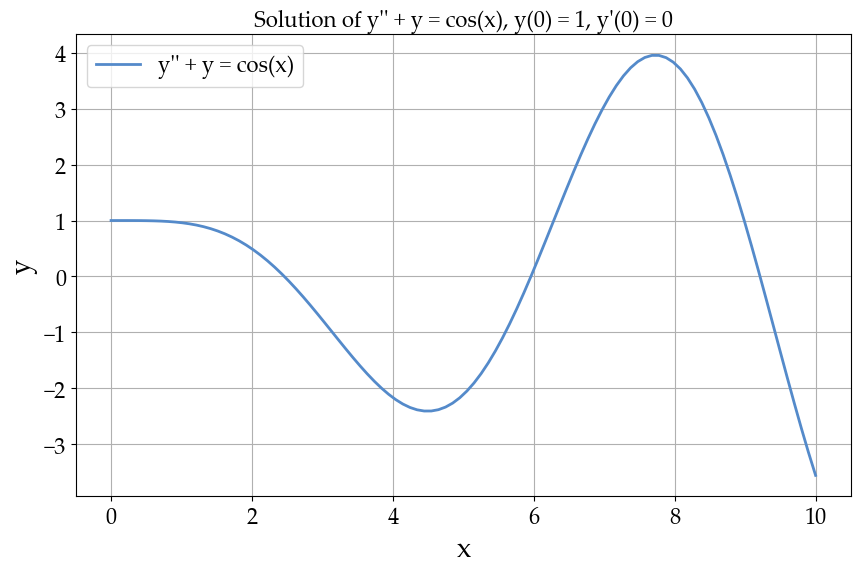

In [2]:
y = Function('y')(x)
eq = Eq(y.diff(x, x) + y, cos(x))
sol = dsolve(eq, y, ics={y.subs(x, 0): 1, y.diff(x).subs(x, 0): 0})

# 生成数值数据点
x_vals = np.linspace(0, 10, 100)
y_vals = [sol.rhs.subs(x, val).evalf() for val in x_vals]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color=(84/255, 138/255, 202/255), linewidth=2)
plt.title('Solution of y\'\' + y = cos(x), y(0) = 1, y\'(0) = 0', fontsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['y\'\' + y = cos(x)'], fontsize=16)
plt.grid(True)
plt.show()

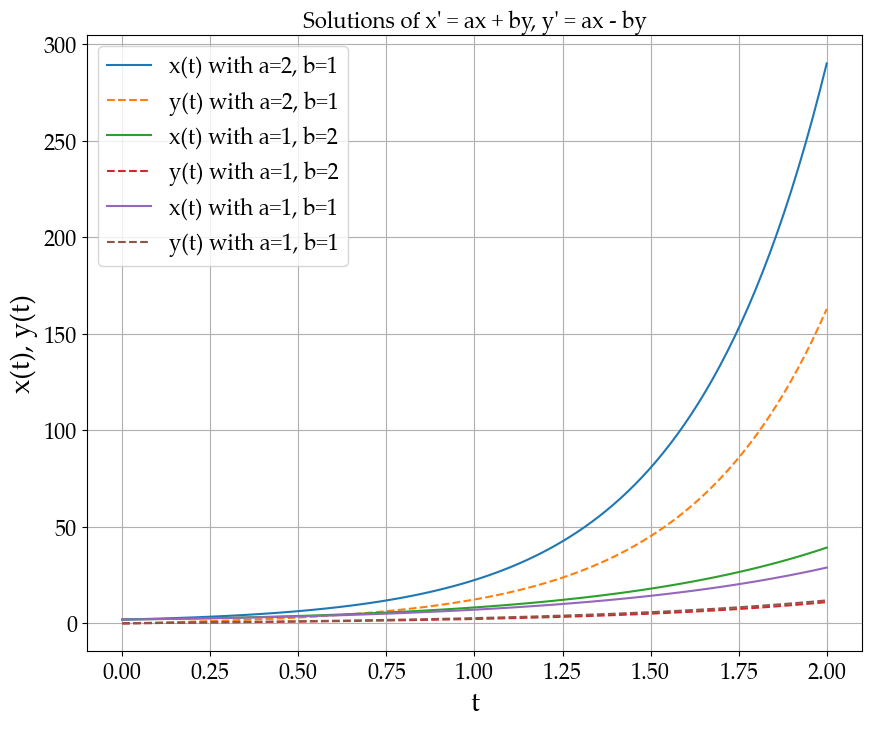

In [3]:
from sympy import Derivative
# 定义符号
t = symbols('t')
a, b = symbols('a b')
X = Function('X')(t)
Y = Function('Y')(t)

# 参数组合
params = [(2, 1), (1, 2), (1, 1)]

plt.figure(figsize=(10, 8))

for (a_val, b_val) in params:
    # 定义微分方程
    eq1 = Eq(Derivative(X, t), a*X + b*Y)
    eq2 = Eq(Derivative(Y, t), a*X - b*Y)

    # 求解微分方程
    sol = dsolve([eq1, eq2], ics={X.subs(t, 0): 2, Y.subs(t, 0): 0})

    # 替换参数并提取解
    x_sol = sol[0].rhs.subs({a: a_val, b: b_val})
    y_sol = sol[1].rhs.subs({a: a_val, b: b_val})

    t_vals = np.linspace(0, 2, 100)

    x_vals = [x_sol.subs(t, t_val).evalf() for t_val in t_vals]
    y_vals = [y_sol.subs(t, t_val).evalf() for t_val in t_vals]

    plt.plot(t_vals, x_vals, label=f'x(t) with a={a_val}, b={b_val}',)
    plt.plot(t_vals, y_vals, label=f'y(t) with a={a_val}, b={b_val}', linestyle='--')

plt.title('Solutions of x\' = ax + by, y\' = ax - by', fontsize=16)
plt.xlabel('t', fontsize=20)
plt.ylabel('x(t), y(t)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

## 问题二：使用`ode23`或`ode45`方法来求解以下两个常微分方程问题，并绘制它们的解的图形

\begin{align}
x' &= \sin(t)x + e^{\sin(t)}, & x(0) &= 2.35 \tag{2.1} \\
(t+1)x'' + (x+t)x' + x^2 &= t\cos(t), & x(0) &= 2, & x'(0) &= -1 \tag{2.2} \\
\end{align}

>note: 解决第一个问题，即 $x' = \sin(t)x + e^{\sin(t)}$，初始条件 $x(0) = 2.35$。我们将使用`RK45`求解器，这是`scipy.integrate.solve_ivp`中`ode45`的等效物。

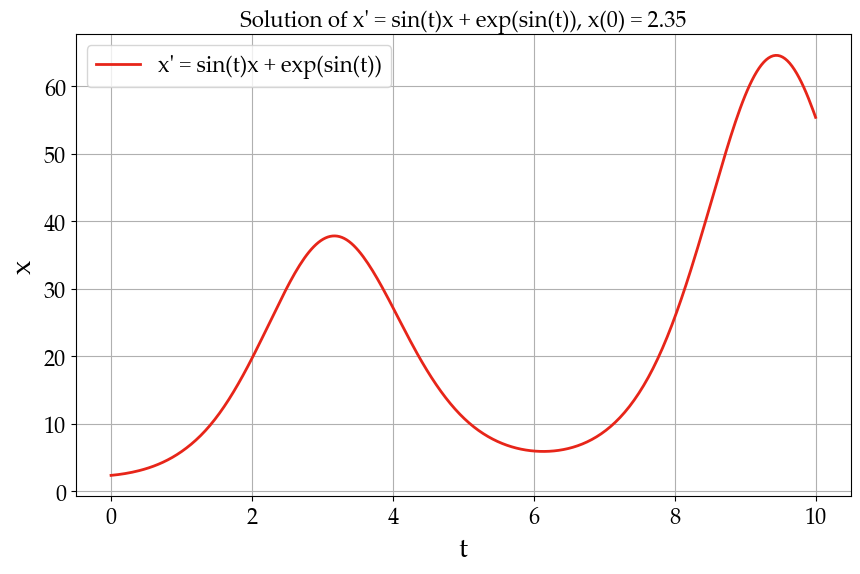

In [4]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def equation(t, x):
    return np.sin(t) * x + np.exp(np.sin(t))

t_span = (0, 10)
initial_condition = [2.35]

sol = solve_ivp(equation, t_span, initial_condition, method = 'RK45', dense_output=True)

t = np.linspace(0, 10, 300)
x = sol.sol(t).flatten()

plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(231/255, 37/255, 25/255), linewidth=2)
plt.title('Solution of x\' = sin(t)x + exp(sin(t)), x(0) = 2.35', fontsize=16)
plt.xlabel('t', fontsize=20)
plt.ylabel('x', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['x\' = sin(t)x + exp(sin(t))'], fontsize=16)
plt.grid(True)
plt.show()

对于第二个问题 $(t+1)x'' + (x+t)x' + x^2 = t\cos(t)$，我们需要将这个二阶微分方程转换为一阶微分方程组来求解。设 $y_1 = x$ 和 $y_2 = x'$，则可以转化为：

$$
\begin{align*}
y_1' & = y_2, \\
y_2' & = \frac{t\cos(t) - y_1^2 - (y_1 + t)y_2}{t + 1},
\end{align*}
$$

初始条件变为 $y_1(0) = 2, y_2(0) = -1$。

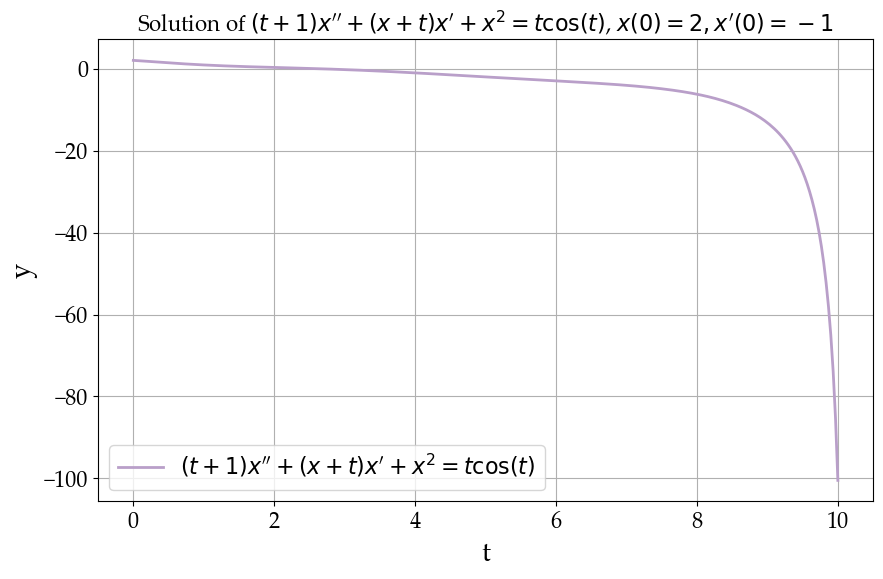

In [5]:
def equation(t, y):
    y1, y2 = y
    dy1dt = y2
    dy2dt = (t * np.cos(t) - y1 ** 2 - (y1 + t) * y2) / (t + 1)
    return [dy1dt, dy2dt]

initial_condition = [2, -1]

sol = solve_ivp(equation, t_span, initial_condition, method = 'RK45', dense_output=True)

t = np.linspace(0, 10, 300)
y = sol.sol(t)

plt.figure(figsize=(10, 6))
plt.plot(t, y[0], color=(185/255, 159/255, 201/255), linewidth=2)
plt.title('Solution of $(t+1)x\'\' + (x+t)x\' + x^2 = t\cos(t)$, $x(0) = 2, x\'(0) = -1$', fontsize=16)
plt.xlabel('t', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['$(t+1)x\'\' + (x+t)x\' + x^2 = t\cos(t)$'], fontsize=16)
plt.grid(True)
plt.show()

## 问题三：求解广义Lorenz系统

$$
z' = \text{diag}(a_1, a_2, a_3)z + \begin{pmatrix} 1 & -1 & 0 \end{pmatrix}z\begin{pmatrix} 0 & 0 & -1 \\ 0 & 0 & -1 \\ 1 & b & 0 \end{pmatrix}z
$$

当固定参数 $a1, a2, a3$ 为 $8,-16,-1$ 时，试讨论随参数 $b$ 由小到大变化 $(b>-1)$ ，而方程解的变化情况，并且画出空间曲线图形，观察空间曲线是否形成混沌状？

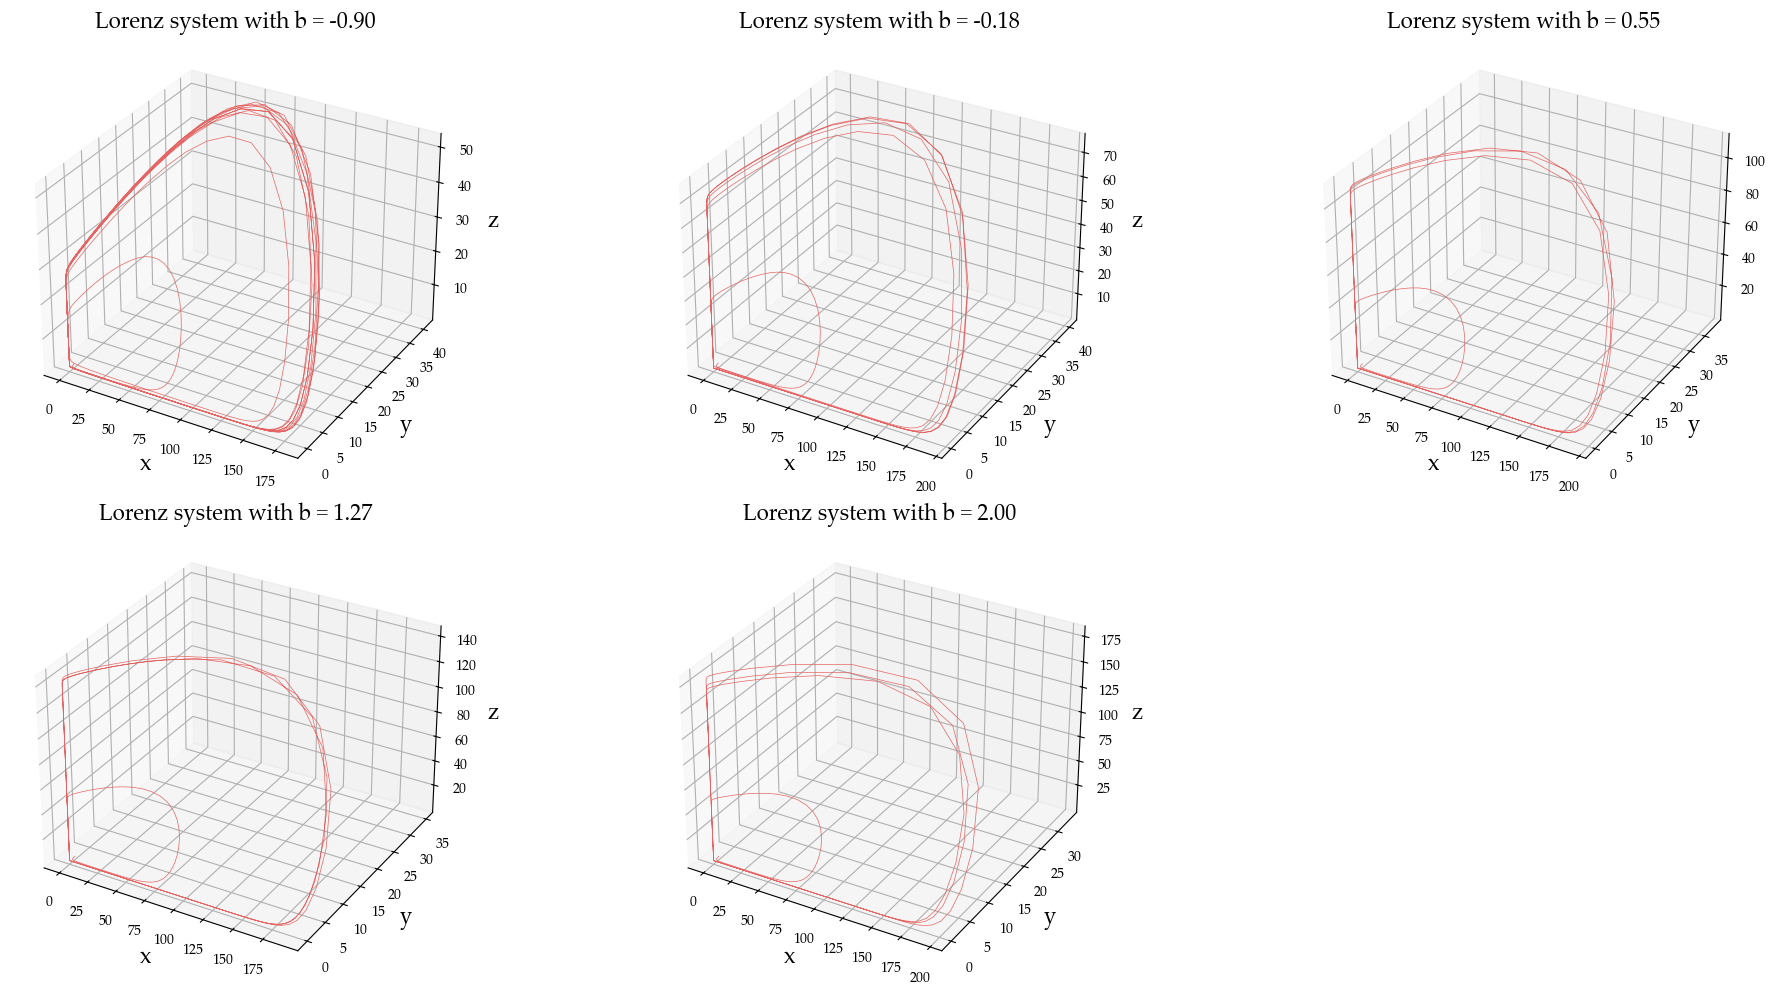

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a1, a2, a3 = 8.0, -16.0, -1.0
initial_state = np.array([1.0, 1.0, 1.0])

t_span = [0, 40]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

def lorenz(t, z, b):
    x, y, z = z
    x_dot = a1 * x + x * (z * (-1) + y * (-1))
    y_dot = a2 * y + y * (z * (-1) + x * 1)
    z_dot = a3 * z + x * (y * 1) + y * (b * z)
    return [x_dot, y_dot, z_dot]

b_vals = np.linspace(-0.9, 2.0, 5)
solutions = []

for b in b_vals:
    sol = solve_ivp(lorenz, t_span, initial_state, args=(b,), t_eval=t_eval)
    solutions.append(sol)

fig = plt.figure(figsize=(20, 10))

for i, solution in enumerate(solutions):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(solution.y[0], solution.y[1], solution.y[2], color=(228/255, 101/255, 100/255), lw=0.5)
    ax.set_title(f'Lorenz system with b = {b_vals[i]:.2f}', fontsize=16)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.set_zlabel('z', fontsize=16)
    ax.grid(True)

plt.tight_layout()
plt.show()

通过数值模拟Lorenz系统并绘制空间曲线图，我们可以看到以下现象：

- 当参数 $ b $ 的值从略高于 $-1$ 开始增加时，系统的解表现出较为**规则**的行为，轨迹看起来较为**平滑和连续**。
- 随着 $ b $ 值的进一步增加，系统的解开始出现更复杂的行为，轨迹在空间中表现出**更多的折叠和弯曲**，这是向混沌行为过渡的迹象。
- 在 $ b $ 较大的值下，比如 $ b = 2 $，轨迹变得更不规则，出现了**混沌状态**的典型特征，表明系统的行为对初始条件高度敏感。

这些观察结果均表明，随着参数 $ b $ 的增加，Lorenz系统**从有序状态过渡到混沌状态**，这符合混沌理论中对于参数变化引起动力学行为改变的预期。简单来说，参数 $ b $ 的增加似乎促进了系统由有序向混沌的过渡。

## 问题四：求解微分方程组并画轨迹

这道题目首先给出了一组非线性的常微分方程组，如下：

$$
\begin{cases}
\dot{x_1}(t) = x_2(t) + \cos(t) \\
\dot{x_2}(t) = \sin(2t)
\end{cases}
$$

接着给定初始条件，如下：

当 $ t = 0 $ 时，$ x_1(0) = 1 $，$ x_2(0) = -1 $。

要求我们解的是在 $ t $ 从 $0$ 到 $30$ 的区间上，这个微分方程组的解，并且要画出 $ x_1 $ 与 $ x_2 $ 的轨迹图。

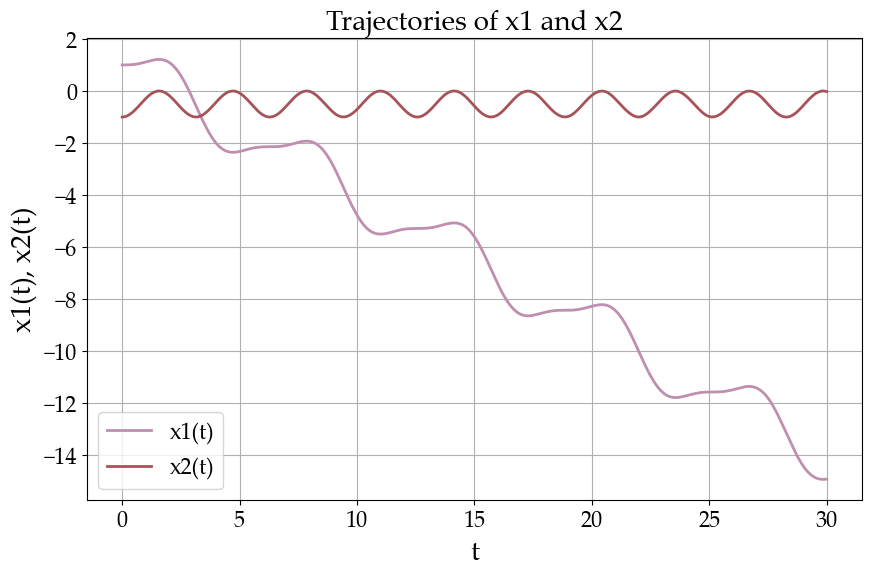

In [7]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def equation(t, y):
    x1, x2 = y
    dx1dt = x2 + np.cos(t)
    dx2dt = np.sin(2 * t)
    return [dx1dt, dx2dt]

y0 = [1.0, -1.0]
t_span = (0, 30)

sol = solve_ivp(equation, t_span, y0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], color='#C08EAF', linewidth=2, label='x1(t)')
plt.plot(sol.t, sol.y[1], color='#A7535A', linewidth=2, label='x2(t)')
plt.title('Trajectories of x1 and x2', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.ylabel('x1(t), x2(t)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

## 问题五：求解种群互动模型

### 问题重述

该问题描述了两个种群的互动模型，是一个具有竞争关系的两种群Logistic模型。这个模型假定两个种群之间存在竞争关系，即一个种群的数量增加会对另一个种群产生负面影响。具体的模型由两个微分方程组成，表示两个种群数量随时间的变化率。方程中包含了种群的自然增长率 $ r_1 $ 和 $ r_2 $，环境承载量 $ n_1 $ 和 $ n_2 $，以及相互作用系数 $ \alpha $ 和 $ \beta $。


具体方程如下：

$$
\begin{align*}
\frac{dx_1}{dt} &= r_1x_1\left(1-\frac{x_1 + m_2}{n_1}\right), \quad m_2=\alpha x_2 \\
\frac{dx_2}{dt} &= r_2x_2\left(1-\frac{x_2 + m_1}{n_2}\right), \quad m_1=\beta x_1
\end{align*}
$$

其中 $ x_1(t) $ 和 $ x_2(t) $ 分别表示时间 $ t $ 时刻两个种群的数量。

我们需要分析两种情况下的种群动态：

1. 当 $ r_1 = r_2 = 1 $， $ n_1 = n_2 = 100 $， $ \alpha = 0.5 $， $ \beta = 2 $，以及初始种群数量 $ x_{10} = x_{20} = 10 $ 的情况；
2. 当 $ \alpha = 1.2 $， $ \beta = 0.8 $，其他参数不变时的种群动态。

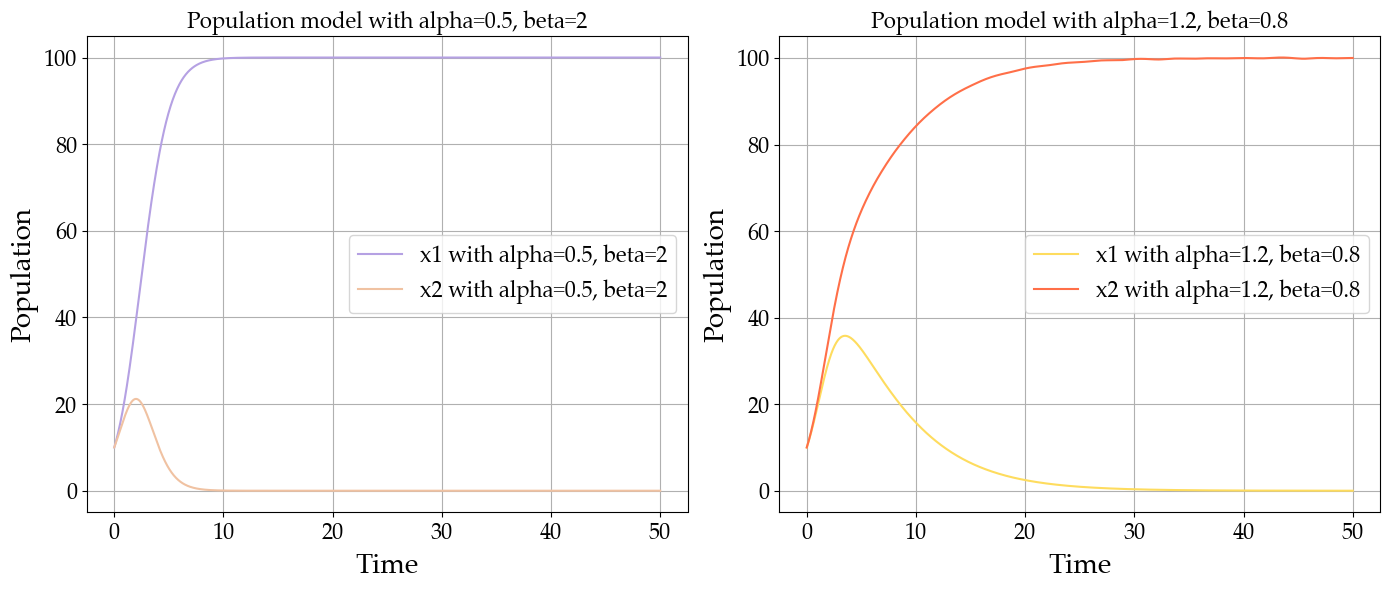

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def population_model(t, z, r1, r2, n1, n2, alpha, beta):
    x1, x2 = z
    dx1dt = r1 * x1 * (1 - (x1 + alpha * x2) / n1)
    dx2dt = r2 * x2 * (1 - (x2 + beta * x1) / n2)
    return [dx1dt, dx2dt]

# 设置参数
r1 = r2 = 1
n1 = n2 = 100
alpha1 = 0.5
beta1 = 2
x10 = x20 = 10

# 使用solve_ivp求解微分方程
t_span = (0, 100)
y0 = [x10, x20]
sol1 = solve_ivp(population_model, t_span, y0, args=(r1, r2, n1, n2, alpha1, beta1), dense_output=True)

# 对于改变的alpha和beta参数重复解方程
alpha2 = 1.2
beta2 = 0.8
sol2 = solve_ivp(population_model, t_span, y0, args=(r1, r2, n1, n2, alpha2, beta2), dense_output=True)

# 绘制图形
t = np.linspace(0, 50, 1000)
x1_1, x2_1 = sol1.sol(t)
x1_2, x2_2 = sol2.sol(t)

# 绘制第一组参数的曲线
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t, x1_1, label='x1 with alpha=0.5, beta=2', color='#B5A1E3')
plt.plot(t, x2_1, label='x2 with alpha=0.5, beta=2', color='#F0C2A2')
plt.title('Population model with alpha=0.5, beta=2', fontsize=16)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# 绘制第二组参数的曲线
plt.subplot(1, 2, 2)
plt.plot(t, x1_2, label='x1 with alpha=1.2, beta=0.8', color='#FEDC5E')
plt.plot(t, x2_2, label='x2 with alpha=1.2, beta=0.8', color='#FF6F48')
plt.title('Population model with alpha=1.2, beta=0.8', fontsize=16)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

### 结果分析

在第一组参数条件下 $α=0.5, β=2$，种群 $x_1$ 的数量经历了**快速的增长**后达到**稳定**，而种群 $x_2$ 的数量则先**少量抬升**但随后**迅速下降**到接近零。这表明种群 $x_1$ 占据了竞争优势，导致种群 $x_2$ 几乎灭绝。

在第二组参数条件下 $α=1.2, β=0.8$，种群 $x_2$ 的数量增长且最后达到稳定但**增长速度明显低于左图**，而种群 $x_1$ 的数量先**抬升**而后**下降**到接近零但该过程**持续时间明显也长于左图**。这表明种群 $x_2$ 占据了竞争优势，导致种群 $x_1$ 最终几乎灭绝。但值得注意的是，在前期两者数量差距不大时，两者竞争差距不大，增长与下降程度明显小于左图。

综合来看，哪一个种群对另一个种群的相互作用系数越大，其竞争力越强，其越容易占据竞争优势且导致另一个种群最终接近灭绝。而两个相互作用系数的差距越大，则表明两者竞争越激烈，导致优势方的上升与弱势方的衰落更加迅速！

## 问题六：部落人口分布建模

### 问题重述

对于一个没有移民的部落，其人口按年龄结构分为五个子群体：$0-15$ 岁、$15-30$ 岁、$30-45$ 岁、$45-60$ 岁、$60-75$ 岁。其中，只有第二（$15-30$岁）和第三（$30-45$岁）个子群体具有生育能力，生育率分别为 $1.25$ 和 $1.13$ 。前四个种群的存活率分别为 $0.90、0.96、0.93$ 和 $0.73$。在初始时刻，五个子群体的人数分别是 $1000、900、800、700$ 和 $600$。要求给出各个子群体随时间变化的曲线，并解释人口的稳定分布比例。此外，还需考虑如何使得总人口数是稳定的，并提出相应的措施。

### 问题求解

我们可以通过构建一个矩阵模型来模拟部落人口的演变，其用于描述年龄结构种群的动态变化，其中包括生育率、存活率和人口分布。

首先我们提取到以下关键数据信息：

- 分五个年龄组：$0-15, 15-30, 30-45, 45-60, 60-75$ 岁。
- 生育率：第二（$15-30$ 岁）和第三个（$30-45$ 岁）子群体的生育率分别为 $1.25$ 和 $1.13$。
- 存活率：前四个子群体的存活率分别为 $0.90, 0.96, 0.93$ 和 $0.73$。
- 初始人口分布：$1000, 900, 800, 700, 600。$

然后我们构建如下矩阵方程：$X_{t+1} = LX_t$，其中 $X_t$ 是在时间 $t$ 时的人口向量，$L$ 是种群转换矩阵，包含生育率和存活率。

转换矩阵$L$将如下所示：

$$
L = \begin{bmatrix}
0 & 1.25 & 1.13 & 0 & 0 \\
0.9 & 0 & 0 & 0 & 0 \\
0 & 0.96 & 0 & 0 & 0 \\
0 & 0 & 0.93 & 0 & 0 \\
0 & 0 & 0 & 0.73 & 0 \\
\end{bmatrix}
$$

初始人口向量$X_0$为：

$$
X_0 = \begin{bmatrix}
1000 \\
900 \\
800 \\
700 \\
600 \\
\end{bmatrix}
$$

接着我们进行代码实现

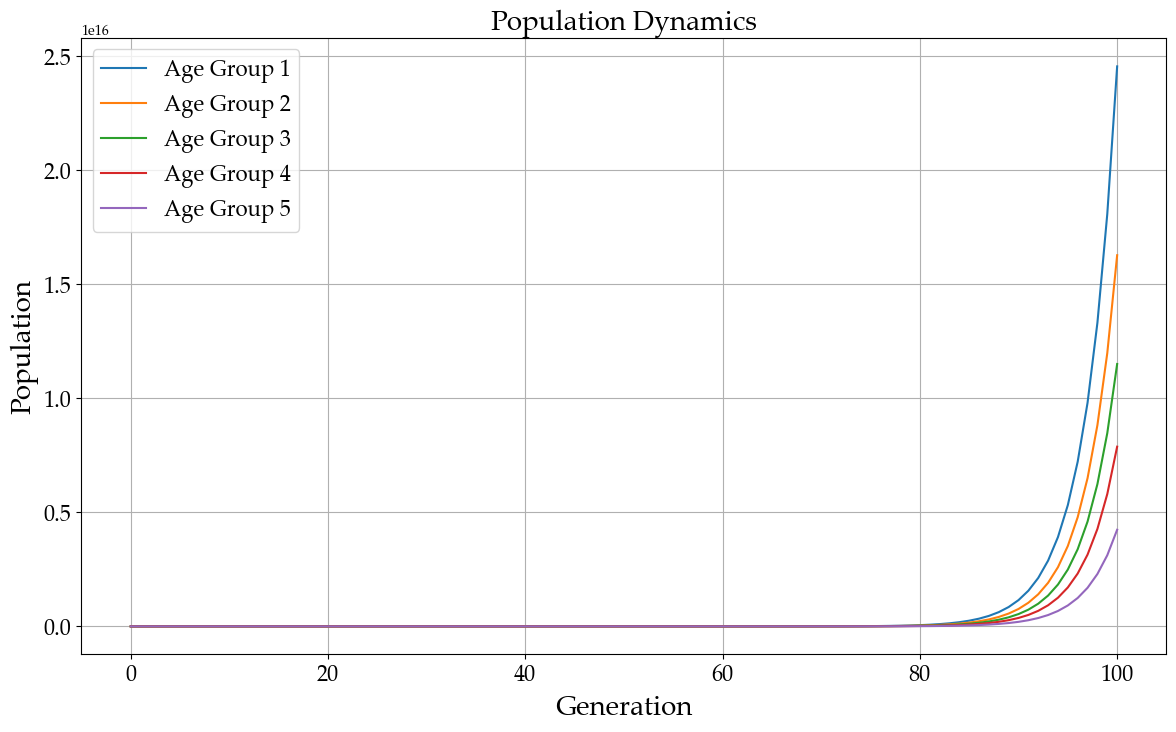

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 转换矩阵 L
L = np.array([
    [0, 1.25, 1.13, 0, 0],
    [0.9, 0, 0, 0, 0],
    [0, 0.96, 0, 0, 0],
    [0, 0, 0.93, 0, 0],
    [0, 0, 0, 0.73, 0]
])

# 初始人口向量 X_0
X_0 = np.array([1000, 900, 800, 700, 600])

# 存储人口向量
populations = [X_0]
generations = 100

# 计算人口向量
for _ in range(generations):
    X_0 = L @ X_0
    populations.append(X_0)

populations = np.array(populations)

# 绘制人口变化图
plt.figure(figsize=(14, 8))
for i in range(populations.shape[1]):
    plt.plot(populations[:, i], label=f'Age Group {i+1}')

plt.title('Population Dynamics', fontsize=20)
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [10]:
# 最后一代的人口分布比例
final_population_proportion = populations[-1] / populations[-1].sum()
print(final_population_proportion)

[0.38099169 0.25251103 0.17851468 0.12225854 0.06572407]


### 结果分析

从模拟结果中，我们可以看到各个年龄组的人口随时间的变化趋势。随着时间的推移，人口分布达到了一种**稳定的比例**，这反映了年龄结构种群在没有外部干预的条件下自然演变的结果。

在模拟的最后一代中，人口的稳定分布比例大约为：

- 第一年龄组$（0-15岁）: 38.1\%$
- 第二年龄组$（15-30岁）: 25.3\%$
- 第三年龄组$（30-45岁）: 17.9\%$
- 第四年龄组$（45-60岁）: 12.2\%$
- 第五年龄组$（60-75岁）: 6.6\%$

这表明，随着时间的推进，年轻的年龄组将占据人口的较大比例。

### 建议提供

为了使总人口数稳定，我们可以考虑以下几个方面：

1. **调整生育率**：通过适当降低具有生育能力年龄组的生育率，可以帮助控制人口增长速度。
2. **提高存活率**：增加老年组的存活率，尤其是 $45-60$ 岁和 $60-75$ 岁的存活率，可以帮助平衡人口结构。
3. **政策干预**：实施人口控制政策，例如计划生育政策，以控制人口总数。